# Describing Distributions (Core)

In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

1. The features to analyze: 
- VitD_levels
- Doc_visits
- TotalCharge

<b> For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
    - Add a line for the mean (red)
    - Add a line for the median (green)
    - Add a line for for +1 std from the mean (black)
    - Add a line for the - 1 std from the mean (black)
    - Highlight the range between +1 and =1 std (yellow)

    
2. Answer the following questions:
    1. Is it Discrete or Continuous?
    2. Does it have a skew? If so, which direction (+/-)
    3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('data.csv')
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.99812
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.19246


In [3]:
def histoplot(data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    std_plus_one = mean + std
    std_minus_one = mean - std
    
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.histplot(data = data, ax = ax, stat = 'probability')
    
    ax.axvline(mean, color = 'red', 
               label = f'Mean = {mean:,.2f}') # line for mean
    ax.axvline(median, color = 'green', ls = '--', 
               label = f'Median = {median:,.2f}') # line for median
    ax.axvline(std_plus_one, color = 'black', 
               label = f'+1 std = {std_plus_one:,.2f}') # line +1 std
    ax.axvline(std_minus_one, color = 'black', 
               label = f'-1 std = {std_minus_one:,.2f}') # line -1 std
    ax.axvspan(std_plus_one, std_minus_one, color = 'yellow', 
               zorder = 0)

    ax.legend();

# VitD_levels

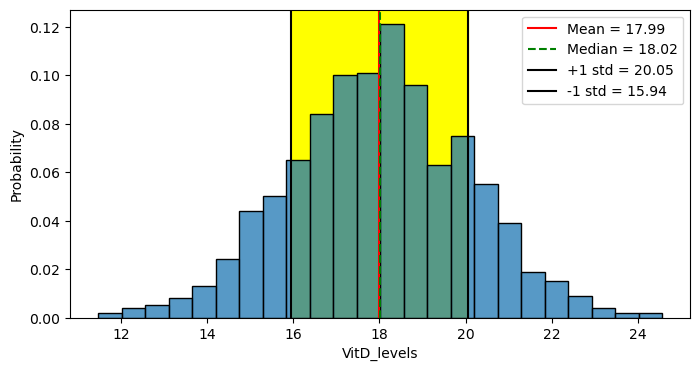

In [4]:
vitD = df['VitD_levels']
histoplot(vitD)

In [5]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

1. Is it Discrete or Continuous?
    - Continuous
2. Does it have a skew? If so, which direction 
(+/-)
    - Looking at the Legend, there is only 0.03 difference so this is has a normal distribution.
3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Mesokurtic 
    
# Doc_visits

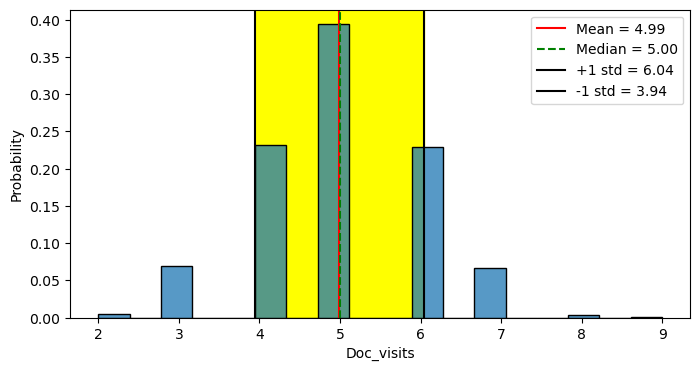

In [6]:
doc_v = df['Doc_visits']
histoplot(doc_v)

In [7]:
kurt1 = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt1

2.9919958083381206

1. Is it Discrete or Continuous?
    - Discrete
2. Does it have a skew? If so, which direction 
(+/-)
    - Normal Distribution
3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Platykurtic 
    
# TotalCharge

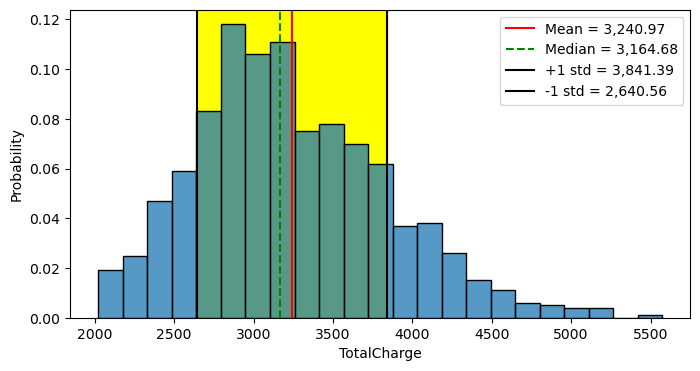

In [8]:
charge = df['TotalCharge']
histoplot(charge)

In [9]:
kurt3 = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt3

3.2650077463439384

1. Is it Discrete or Continuous?
    - Continuous
2. Does it have a skew? If so, which direction 
(+/-)
    - Positively Skewed
3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
    - Leptokurtic  